https://tinyurl.com/app

In [ ]:
!git clone https://github.com/artxz/EKG_demo.git

Cloning into 'EKG_demo'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [ ]:
%cd EKG_demo/

/content/EKG_demo


In [ ]:
#!rm -rf EKG_demo/
!ls

'CRC demo.ipynb'  'demo data'   README.md   utils.py


In [ ]:
!pip install pydub ### download necessary libraries

In [ ]:
### import necessary packages
from pydub import AudioSegment
import matplotlib.pyplot as pl
import numpy as np
from scipy.signal import find_peaks
from glob import glob
import os, sys
import utils as ut
from numpy.fft import rfft, rfftfreq
import pandas as pd
from imp import reload
from importlib import reload

## Part I - Gaining control over your heart rate
### An exploration into Cardio-Respiratory-Coupling

Define data path

In [ ]:
# from google.colab import files
# upload = files.upload()

In [ ]:
filepath = 'demo data/BYB_Recording_2021-12-28_15.55.33.wav'
txtpath = 'demo data/BYB_Recording_2021-12-28_15.55.33-events.txt'

In [ ]:
#reload(ut)

<module 'utils' from '/usr/local/lib/python3.7/dist-packages/utils/__init__.py'>

In [ ]:
c = ut.cardio(filepath)
c.load_data() # load raw data
c.load_events(txtpath)

data succesfully loaded!
demo data/BYB_Recording_2021-12-28_15.55.33-events.txt


### Check where data is stored

In [ ]:
c.df ## raw data saved as variable df

,data,xsec,xmin
0,-149,0.0000,0.000000
1,-148,0.0001,0.000002
2,-148,0.0002,0.000003
3,-148,0.0003,0.000005
4,-148,0.0004,0.000007
...,...,...,...
634813,-64,63.4813,1.058022
634814,-64,63.4814,1.058023
634815,-65,63.4815,1.058025
634816,-66,63.4816,1.058027


In [ ]:
c.dft ## event data save as variable dft

,ID,time
0,1,1.6057
1,2,5.6420
2,1,14.5545
3,2,18.7426
4,1,26.9173
5,2,32.0571
6,1,40.8363
7,2,45.1577
8,1,53.3324
9,2,57.5701


## Inspect raw data - what does your EKG look like?

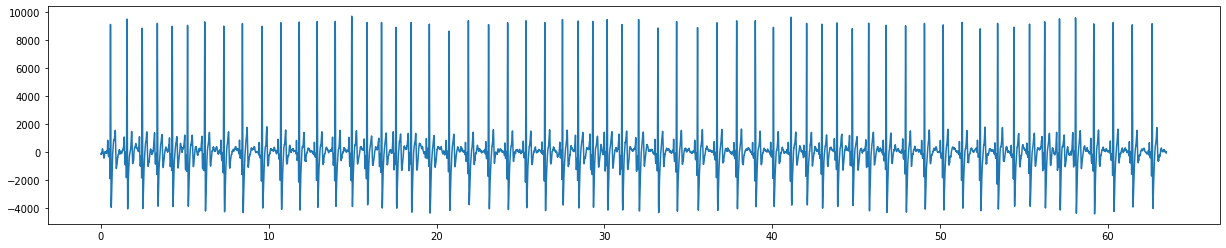

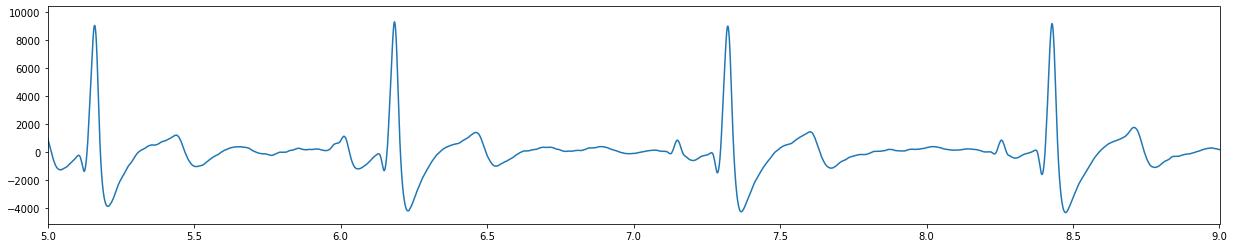

In [ ]:
data = c.df['data']
xaxis = c.df['xsec']
sl = [5, 9] # time range you want to zoom in
figsize = (21, 4)
peaks = []
spath = None # where you want to save data
ut.plot_peaks(data, xaxis, peaks, spath = spath, sl = sl, figsize = figsize) 

### Extract peaks

In [ ]:
threshold = 6000
c.run_analysis(threshold = threshold) ### extract all peaks above threhold
c.create_IDblocks()

### check peaks identified

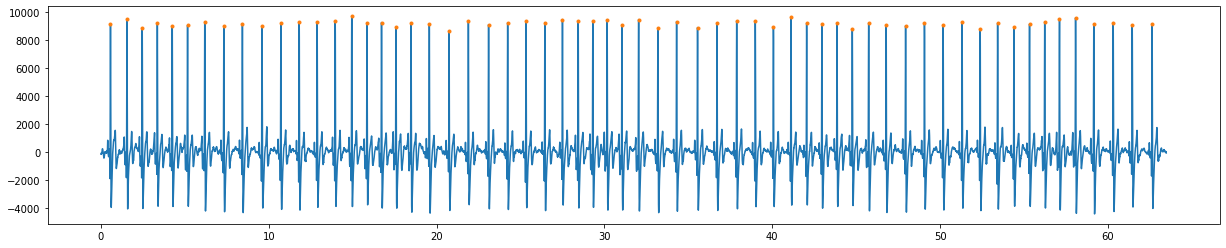

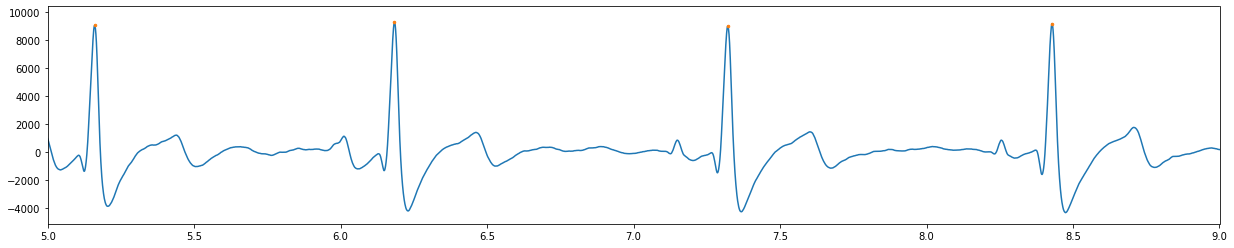

In [ ]:
data = c.df['data']
xaxis = c.df['xsec']
sl = [5, 9] # time range you want to zoom in
figsize = (21, 4)
peaks = c.peaks
spath = None # where you want to save data
ut.plot_peaks(data, xaxis, peaks, spath = spath, sl = sl, figsize = figsize) 

### What is your average heart rate?

In [ ]:
print('location of peaks: \n{}'.format(c.peaks)) ## location of the peaks

### How to get Heart Rate from peak locations?
ibi = np.diff(c.peaks)/c.fps
hr = 1/ibi*60
print(hr.mean())

location of peaks: 
[  5667  15482  24580  33592  42478  51601  61837  73214  84283  95974
 107210 118146 128825 139604 149444 158517 167190 175817 184789 195674
 207450 218944 230988 242349 253291 264507 275008 284408 293103 301651
 310463 320403 331875 343033 355506 367126 378832 389929 400728 411192
 420522 429614 438642 447735 457488 467915 479490 490733 501859 513172
 523935 534326 544063 553346 562387 571207 580785 591632 603213 614548
 626400]
58.66622025483901


In [ ]:
### same thing but stored in a dataframe
print('interbeat interval in seconds: \n{} ...\n'.format(c.df['ibi'].dropna()[:10])) ## all the interbeat interval
print('instantaneous HR identified in beats per min: \n{}...\n'.format(c.df['hr_min'].dropna()[:10]))

interbeat interval in seconds: 
15482     0.9815
24580     0.9098
33592     0.9012
42478     0.8886
51601     0.9123
61837     1.0236
73214     1.1377
84283     1.1069
95974     1.1691
107210    1.1236
Name: ibi, dtype: object ...

instantaneous HR identified in beats per min: 
15482     61.130922
24580      65.94856
33592     66.577896
42478     67.521945
51601      65.76784
61837     58.616647
73214      52.73798
84283     54.205439
95974     51.321529
107210    53.399786
Name: hr_min, dtype: object...



In [ ]:
print('average heart rate: %.1f' % c.df['hr_min'].mean())

average heart rate: 58.7


Inspect average waveform

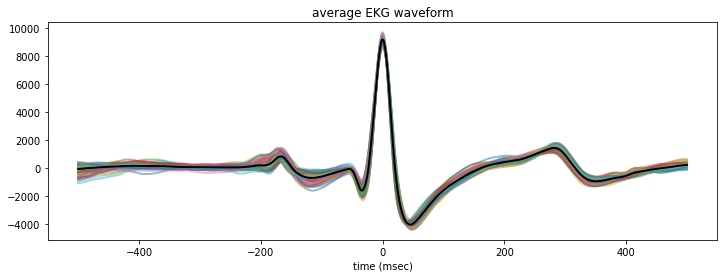

In [ ]:
data = c.df['data']
figsize = (21, 4)
peaks = c.peaks
spath = None # where you want to save data
pre, post = 0.5, 0.5 # how much before and after peask to presever
ut.plot_average_waveform(data, xaxis, peaks ,c.fps, pre, post, spath = spath)

### What parts of the waveform corresponds to atria and ventricular contraction? Which is most prominent?

### Where to place to electrodes to emphasize the other aspect?

Take a new recording and see how it changes

### Evolution of HR in time

In [ ]:
print('IDs detected: {}'.format(c.IDs))


IDs detected: [1. 2.]


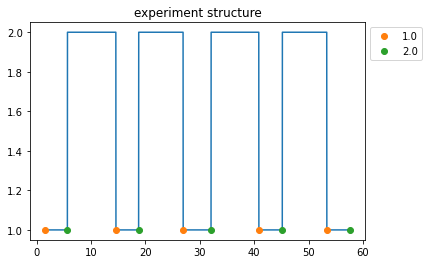

In [ ]:
### check that experimental structure has been correctly detected
pl.figure()
pl.title('experiment structure')
pl.plot(c.df['xsec'],c.df['IDblocks'])
# pl.plot(c.df['xsec'],c.df['ID'],'o')
for ind, i in enumerate(c.IDs):
  pl.plot(c.df['xsec'],c.df[int(i)],'o', label = i)
pl.legend(bbox_to_anchor = (1,1))

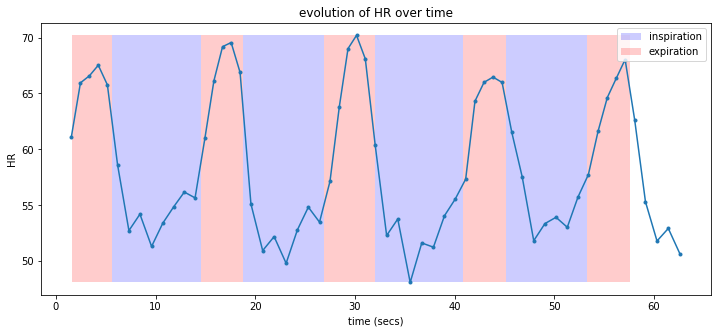

In [ ]:
labels = ['expiration', 'inspiration'] # names of conditions
colors = ['r', 'b']
data = c.df['hr_min'].dropna()
xaxis = c.df[~c.df['hr_min'].isna()]['xsec']
pl.figure(figsize = (12, 5))
minmax = [data.min(), data.max()]
pl.plot(xaxis,data,'.-')
for ind, i in enumerate(c.blockinds.keys()):
    block = c.blockinds[i]
    ID = block['ID']
    inds = block['inds']
    pl.fill_betweenx(y = minmax, x1 = c.df.loc[inds[0], 'xsec'], x2 = c.df.loc[inds[1], 'xsec'], \
                  alpha = .2, facecolor= colors[ID-1], \
                  label = labels[ID-1]);
pl.xlabel('time (secs)')
pl.ylabel('HR')
pl.title('evolution of HR over time')
handles, labels = pl.gca().get_legend_handles_labels()
pl.legend(handles[1:3], labels[1:3], loc = 1)

### Average HR within conditions

In [ ]:
for ind, i in enumerate(c.IDs):
  mean = c.df[c.df['IDblocks'] == i]['hr_min'].dropna().mean()
  print('average HR in condition %d: %.1f' % (i, mean))

average HR in condition 1: 65.0
average HR in condition 2: 53.8


### Distribution of heart rate as function of respiratory cycle

Text(0.5, 1.0, 'histrogram of instantaneous heart beats')

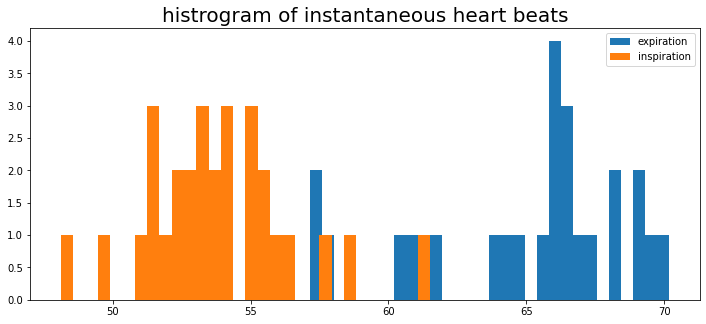

In [ ]:
nbin = 30
figsize = (12, 5)
pl.figure(figsize = figsize)
for ind, i in enumerate(c.IDs):
    pl.hist(c.df[c.df['IDblocks'] == i]['hr_min'].dropna(), bins = nbin, \
            label = labels[ind]);
pl.legend()
pl.title('histrogram of instantaneous heart beats', fontsize = 20)

## Why the difference in Heart Rate when we breathe?
